# CMSE 202 Final S23 (Sect. 4)


### <p style="text-align: right;"> &#9989; Michelangelo Mumby</p>
### <p style="text-align: right;"> &#9989; Infinity-Null</p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

While the exam will be *open* for 12 hours, **you should only take two hours on the exam.** The instructor team is available between 745 am and 945 am to answer questions you might have in the zoom room: https://msu.zoom.us/j/99648827750?pwd=VGhqa2JzL2oxMC8yMHo0L2JLOVJWQT09. The exam was written to take two hours. We'll be going on the honor system for this. There are times when instructors will be available to answer questions. 


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

In [1]:
#I had Git issues, but I made a directory named "final" in Github and uploaded this file along with its seed data csv
#to it. So this should be fine to grade, even if the stepwise work is not visible.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of the physical characteristics of dry seeds (e.g., shape, size, etc.). This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset). We’ll ask you a set of questions that center the classification of these seeds using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv`

In [ ]:
#Write your code for downloading the data here

curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv

In [2]:
#Write your code for importing the data here

import pandas as pd
seeds=pd.read_csv("Seed_data.csv")

## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different seed characteristics. Your visualization should represent each of the different seed type/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

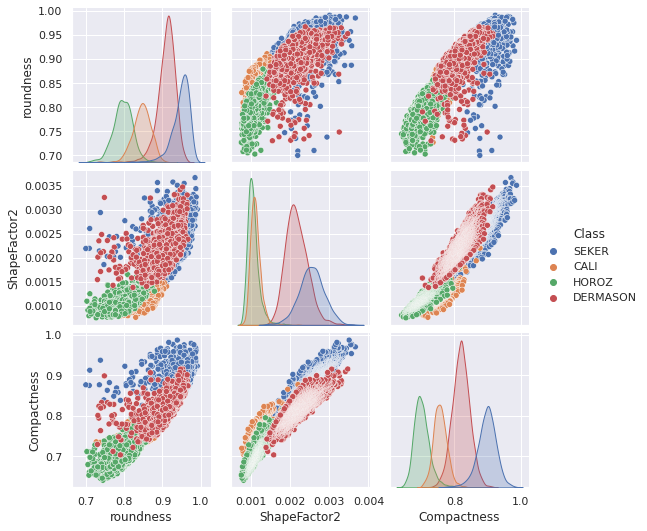

In [3]:
#Write your plotting code here
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")

sns.pairplot(seeds,hue="Class")

## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (I.e., just by eye), which pair of seeds do you think would be **easiest** for an ML technique to differentiate between? Which pair of seeds do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

In my opinion, the easiest to differentiate would like be between Seker and Horoz types, because in several comparitive factors thay have almost no overlap. They are often on opposite sides of the graphs, so differentiation should be easy for them (as a straight line would often be enough to get almost all on one side or the other).

The hardest to separate would probably be Cali and Horoz types because it every single graph, there is overlap, especially in graph number 2,3,4,5,6,7, and 8. There is no single clean line that could be drawn through with no issue. I could see a combination of features potentially getting somewhere, but not simply.

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for the seeds that you believe will be easiest to separate. (You may need to use Google to figure out how to do this.)

In [4]:
#Write your code for selecting your data here

seeds.drop(seeds.loc[seeds['Class']=="CALI"].index, inplace=True)
seeds.drop(seeds.loc[seeds['Class']=="DERMASON"].index, inplace=True)
seeds

,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,SEKER
1,0.887034,0.003564,0.953861,SEKER
2,0.947849,0.003048,0.908774,SEKER
3,0.903936,0.003215,0.928329,SEKER
4,0.984877,0.003665,0.970516,SEKER
...,...,...,...,...
5554,0.794104,0.000830,0.687782,HOROZ
5555,0.785117,0.000782,0.674331,HOROZ
5556,0.802588,0.000837,0.691181,HOROZ
5557,0.777191,0.000816,0.685733,HOROZ


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the actual seed names.) Also, for stupid reasons, set the `random_state` to be 35.

In [5]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split
seed_class=seeds["Class"]
seed_class = seed_class.map( {'SEKER': 0, 'HOROZ': 1} )
seeds=seeds.drop("Class",1)
train_vectors,test_vectors,train_labels,test_labels = train_test_split(seeds,seed_class,random_state=35)

## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. **Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge. It is fine to ignore these warnings. 

In [6]:
#Write your code for training your model here
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#code taken from in class 18
tmp_vectors = train_vectors
tmp_labels = train_labels
n_classes = 2

# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)

predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

Predicting names on the test set


---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data.

In [7]:
#Write your code for determining the accuracy, recall, and precision of your model

#I imported the classification report and confusion matrix up above

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(n_classes)))

#accuracy is the total correct divided by total number of answers
Accuracy=981/983
#precision is the total true positives divided by the number of true and false positives
Precision= 510/511
#recall is is the total true positives divided by the number of true positives and false negatives
Recall= 510/511

print("Accuracy =",Accuracy,"%","Precision =",Precision,"%","Recall =",Recall,"%",
      "no wonder they all rounded to 1.00")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       472

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983

[[510   1]
 [  1 471]]
Accuracy = 0.9979654120040692 % Precision = 0.9980430528375733 % Recall = 0.9980430528375733 % no wonder they all rounded to 1.00


## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

This model did an absolutely incredible job of classifying the data. It was nearly flawless, only getting 2 wrong answers out of 983. This is by far the most accurate out of all the models I have made in class and homework, and it means that I made a good choice early on saying that these two would be the easiest to separate. It's almost perfect, and a great way to end the semester.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University